![jupyter](./flow.png)

In [97]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 读取数据

In [98]:
#读取训练数据
path= './house-prices-advanced-regression-techniques/'
Train_data=pd.read_csv(path+'train.csv')
Train_data.head().append(Train_data.tail())


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## 总览

In [99]:
#总览
Train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 1.对缺失值进行处理

In [100]:
#查看异常值
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [101]:
#查看缺失值及占比
total_miss=Train_data.isnull().sum().sort_values(ascending=False)
percent_miss=(Train_data.isnull().sum()/Train_data.shape[0]).sort_values(ascending=False)
miss_data=pd.concat([total_miss,percent_miss],axis=1,keys=['total','percent'])
miss_data

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


此处发现前六个特征的缺失较多，缺失率大于15%
Garage开头的六个特征都与车库有关，Bsmt开头的五个特征均与地下室有关，MasVnr开头的两个特征也相关，因此缺失个数也都相近
直觉上觉得这些特征都与房价关系不大，因此直接删除这些特征

唯一有一个缺失值的是电力特征，与房价有一定关系，因此将该样本删除

In [102]:
#将缺失值较大的特征删除，认为其与价格之间关系不大
del_features=miss_data[miss_data['total']>1].index
print(del_features)
Train_data=Train_data.drop(del_features,axis=1)
Train_data=Train_data.drop(Train_data.loc[Train_data['Electrical'].isnull()].index,axis=0)


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')


#### 查看是否还存在缺失值

In [103]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 non-

In [104]:
Train_data.isnull().sum().sort_values(ascending=False)

SalePrice        0
OverallQual      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
HouseStyle       0
Heating          0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
MSSubClass       0
                ..
Fireplaces       0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageArea       0
GarageCars       0
Functional       0
CentralAir       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath    

### 2. 查看各特征分布以及关系

In [105]:
#查看各属性的取值分布
for index,row in Train_data.iteritems():
    print(Train_data[index].value_counts())

1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
       ..
995     1
996     1
997     1
998     1
999     1
1000    1
1001    1
982     1
981     1
980     1
969     1
961     1
962     1
963     1
964     1
965     1
966     1
967     1
968     1
970     1
979     1
971     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
1       1
Name: Id, Length: 1459, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
7200     25
9600     24
6000     17
9000     14


Name: Electrical, dtype: int64
864     25
1040    16
912     14
894     12
848     12
672     11
630      9
816      9
960      7
832      7
483      7
936      7
840      6
728      6
764      6
1056     6
882      6
720      6
1728     6
990      6
1088     5
1072     5
1144     5
774      5
1080     5
1314     5
768      5
1422     5
616      5
698      5
        ..
1223     1
1225     1
1229     1
1235     1
1238     1
1240     1
1241     1
1242     1
1090     1
1244     1
1247     1
1248     1
1249     1
1251     1
1256     1
1260     1
1261     1
1265     1
1272     1
1274     1
1279     1
1281     1
1282     1
1283     1
1284     1
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 752, dtype: int64
0       829
728      10
504       9
546       8
672       8
720       7
600       7
896       6
689       5
862       5
756       5
840       5
780       5
702       4
804       4
739       4
741       4
551       4
878       4
1254      3
915       3
677 

#### 查看价格分布

In [106]:
#查看价格分布
Train_data['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
115000    12
160000    12
139000    11
130000    11
185000    10
180000    10
143000    10
125000    10
144000    10
100000     9
127000     9
175000     9
147000     9
170000     8
129000     8
176000     8
250000     8
200000     8
230000     8
141000     8
165000     8
215000     8
235000     7
128000     7
          ..
276000     1
277500     1
326000     1
104000     1
259000     1
254900     1
218000     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
154500     1
52000      1
107400     1
181134     1
68500      1
131400     1
94000      1
317000     1
466500     1
437154     1
219210     1
84900      1
424870     1
410000     1
62383      1
415298     1
34900      1
Name: SalePrice, Length: 663, dtype: int64

In [107]:
Train_data['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### 对价格的曲线进行拟合

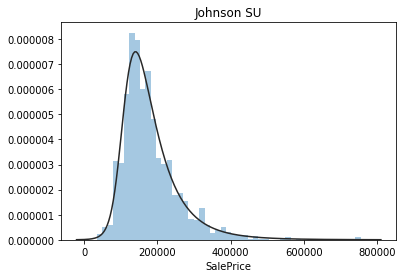

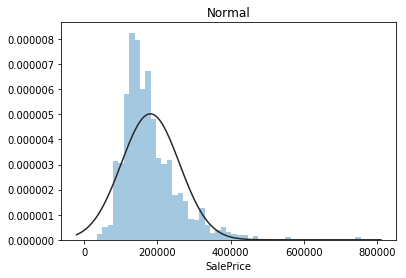

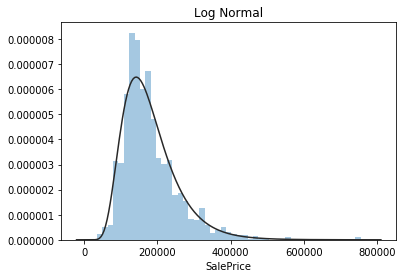

In [108]:
import scipy.stats as st
y=Train_data['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

发现价格并不符合正态分布，最符合价格分布的是Johnson SU,在对价格取log后，发现log价格也比较符合正态分布

(array([148., 722., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

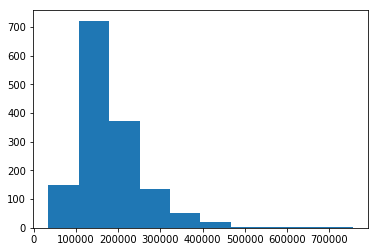

In [109]:
plt.hist(y,orientation='vertical',histtype='bar')

发现价格分布存在长尾现象

(array([  5.,  12.,  54., 184., 470., 399., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

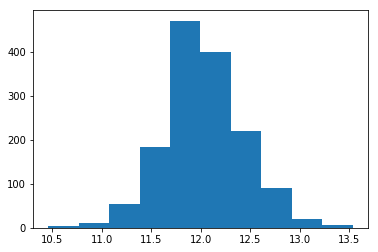

In [110]:
plt.hist(np.log(y),orientation='vertical',histtype='bar')

对价格取log后，长尾现象消失

#### 将特征分为连续特征、离散特征

In [111]:
#划分numerical、categorical属性
features=Train_data.columns
numeric_features=[]
categorical_features=[]
for f in features:
    if str(Train_data[f].dtype)=='object':
        categorical_features.append(f)
    else:
        numeric_features.append(f)
print('number of categorical feature:'+repr(len(categorical_features)))
print(categorical_features)
print('number of numeric feature:'+repr(len(numeric_features)))
print(numeric_features)


number of categorical feature:28
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
number of numeric feature:35
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


#### 用曲线对每个连续特征进行拟合

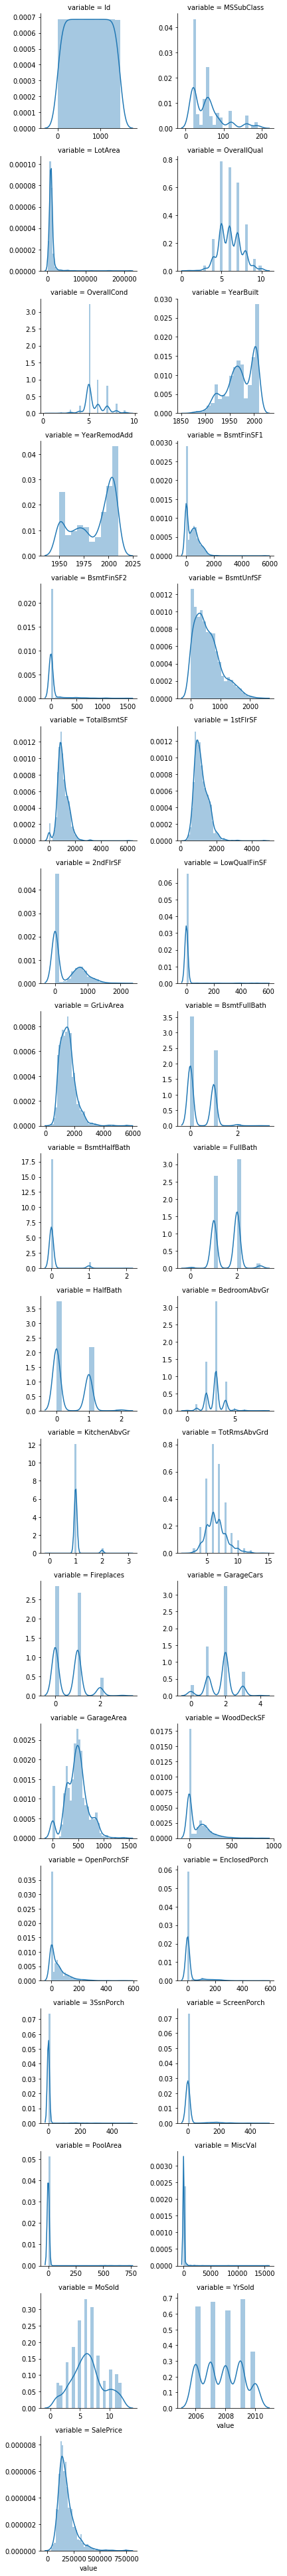

In [112]:
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

从图像来看LotArea、1stFirSF、GrLivArea、TotalBsmtSF等特征，似乎都存在长尾现象

#### 计算连续特征之间的相关性

In [113]:
#查看numerical属性与价格相关性
Train_numeric=Train_data[numeric_features]
numeric_correlation=Train_numeric.corr()
numeric_correlation_sort=numeric_correlation['SalePrice'].sort_values(ascending=False)
k=20
topk_features=numeric_correlation_sort[1:k+1]
topk_features=list(topk_features.keys())
topk_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'Fireplaces',
 'BsmtFinSF1',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr']

前20个与价格相关性较高的特征如上

#### 绘制相关性热力图

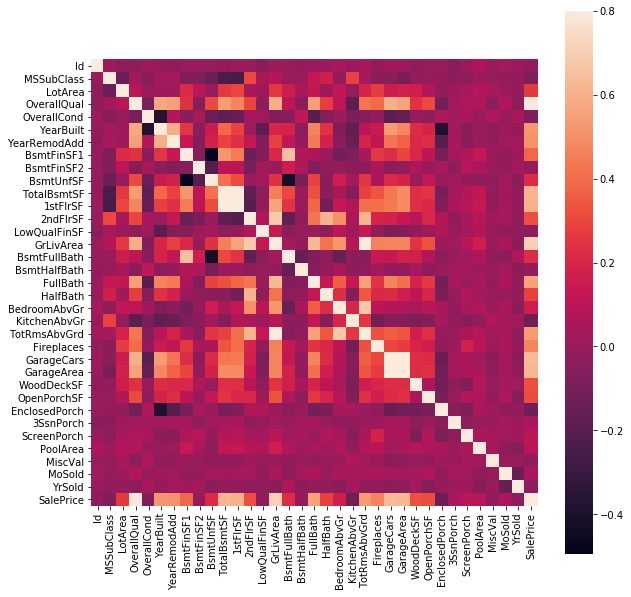

In [114]:
#各数字特征相关性热力图，
plt.figure(figsize=(10,10))
sns.heatmap(numeric_correlation,vmax=.8,square=True)


### 3. 对离散的特征，需要进行onehot编码

In [115]:
#类别特征
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [116]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 non-

In [117]:
#对类别特征进行onehot编码
Train_data=pd.get_dummies(Train_data)

In [118]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 222 entries, Id to SaleCondition_Partial
dtypes: int64(35), uint8(187)
memory usage: 676.8 KB


In [119]:
Train_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,10517.363948,6.100069,5.575737,1971.244003,1984.850583,443.943797,46.581220,567.366004,...,0.003427,0.083619,0.002056,0.867718,0.069225,0.002742,0.008225,0.013708,0.820425,0.085675
std,421.411181,42.310746,9984.666267,1.383171,1.113079,30.199555,20.644343,456.106417,161.369977,441.992392,...,0.058460,0.276910,0.045314,0.338914,0.253924,0.052306,0.090348,0.116316,0.383965,0.279980
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.500000,20.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.000000,50.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,384.000000,0.000000,479.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1094.500000,70.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,712.500000,0.000000,808.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
#全部特征
features_name=list(Train_data)
features_name.remove('SalePrice')
len(features_name)

221

In [121]:
#连续的特征
continuous_features=numeric_features.copy()
continuous_features.remove("SalePrice")
continuous_features
numeric_features

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### 4. 对测试集进行特征删除、onehot编码等处理

#### 对测试集需要做相应的处理

In [122]:
# 读取测试集
Test_data=pd.read_csv(path+'test.csv')
Test_data.head().append(Test_data.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


#### 将训练集中删除的特征对应删除

In [123]:
# 对应删除训练集中已经删除的特征
print(del_features)
Test_data=Test_data.drop(del_features,axis=1)
Test_data

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
5,1466,60,RL,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,84,0,0,0,0,0,4,2010,WD,Normal
6,1467,20,RL,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,21,0,0,0,0,500,3,2010,WD,Normal
7,1468,60,RL,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,75,0,0,0,0,0,5,2010,WD,Normal
8,1469,20,RL,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
9,1470,20,RL,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,4,2010,WD,Normal


In [124]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 62 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
ExterQual        1459 non-

#### 将测试集的类别特征也进行onehot编码
对于训练集中因onehot多出的特征，在测试集中直接赋值为0
对于测试集中多出的特征，直接将特征删除

In [125]:
# 对类别特征进行处理，
Test_data=pd.get_dummies(Test_data)

# 测试集中缺失的列
miss_features=set(Train_data.columns)-set(Test_data.columns)
for feature in miss_features:
    Test_data[feature]=0

# 测试集中多增的列
add_features=set(Test_data.columns)-set(Train_data.columns)
Test_data=Test_data.drop(list(add_features),axis=1)
Test_data=Test_data[features_name]
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 221 entries, Id to SaleCondition_Partial
dtypes: float64(8), int64(41), uint8(172)
memory usage: 803.7 KB


#### 对测试集中缺失值进行处理

In [126]:
# 查看缺失值
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 221 entries, Id to SaleCondition_Partial
dtypes: float64(8), int64(41), uint8(172)
memory usage: 803.7 KB


#### 对于测试集中缺失值，赋值为训练集对应特征的mean

In [127]:
#测试集中缺失值处理，直接补零
#Test_data=Test_data.fillna(value=0)
for col in Test_data.columns:
    Test_data[col].fillna(np.mean(Train_data[col]),inplace=True)
Test_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,9819.161069,6.078821,5.553804,1971.357779,1983.662783,439.206953,52.615203,554.303883,...,0.002056,0.080192,0.002742,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,421.321334,42.746880,4955.517327,1.436812,1.113740,30.390071,21.130467,455.111905,176.693371,437.110642,...,0.045314,0.271683,0.052306,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,1461.000000,20.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1825.500000,20.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,219.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2190.000000,50.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,351.000000,0.000000,460.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2554.500000,70.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,752.000000,0.000000,797.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2919.000000,190.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,4010.000000,1526.000000,2140.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5. 将价格转变为离散形式

In [128]:
# 查看价格分布
des=Train_data['SalePrice'].describe()
des

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 722., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

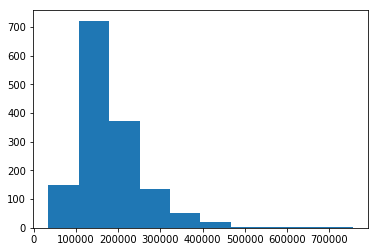

In [129]:
y=Train_data['SalePrice']
plt.hist(y)

直接按照25% , 75% 两个划分点，将价格分为三类

第一个划分点 129950.0 第二个划分点 214000.0

In [130]:
#sp_bins=list(des[['min','25%','75%','max']])
#sp_bins[0]-=1
#sp_bins

In [131]:
#sp_bins=[0.0,172200.0,221250.0,755000.0]

将价格划分为两类，220500为划分点

此处的划分点我是通过kmeans算法得到的

In [132]:
sp_bins=[0.0,220500.0,755000.0]

In [133]:
Train_data['PriceClass']=pd.cut(Train_data['SalePrice'],sp_bins,labels=False,right=True)

查看是否划分成功

In [134]:
Train_data[['PriceClass','SalePrice']]

,PriceClass,SalePrice
0,0,208500
1,0,181500
2,1,223500
3,0,140000
4,1,250000
5,0,143000
6,1,307000
7,0,200000
8,0,129900
9,0,118000


### 6. 对连续特征进行归一化

import 逻辑回归模型

In [135]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression


连续特征

In [136]:
continuous_features.remove('Id')
continuous_features


['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

查看各特征分布

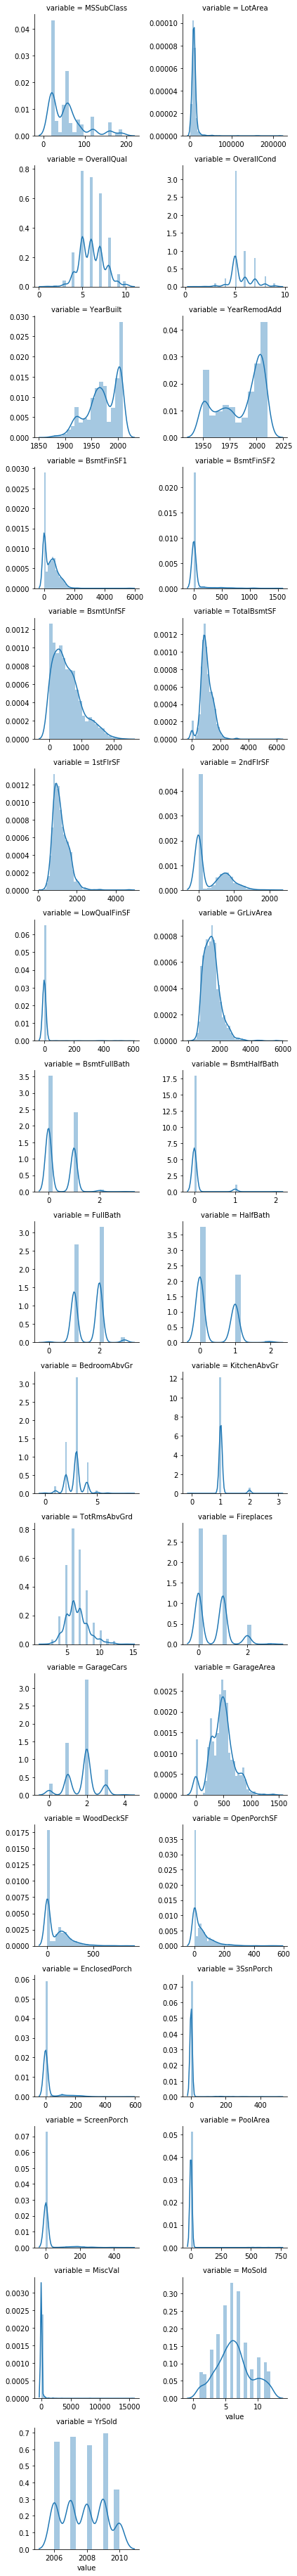

In [137]:
tf = pd.melt(Train_data, value_vars=continuous_features)
tg = sns.FacetGrid(tf, col="variable",  col_wrap=2, sharex=False, sharey=False)
tg = tg.map(sns.distplot, "value")

发现 LotArea、1stFirSF、GrLivArea、TotalBsmtSF 似乎都存在长尾现象
于是对这四个特征取对数，看其分布是否满足正态分布

In [138]:
norm_features=['LotArea','1stFlrSF','GrLivArea','TotalBsmtSF']

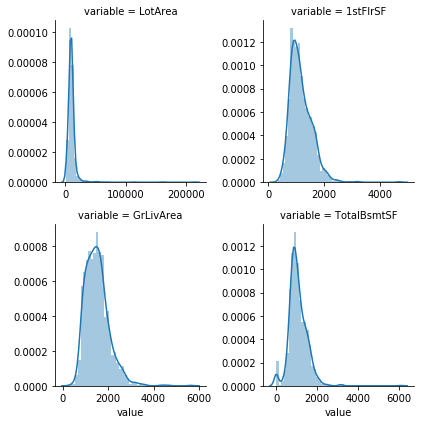

In [139]:
nf = pd.melt(Train_data, value_vars=norm_features)
ng = sns.FacetGrid(nf, col="variable",  col_wrap=2, sharex=False, sharey=False)
ng = ng.map(sns.distplot, "value")

原本分布

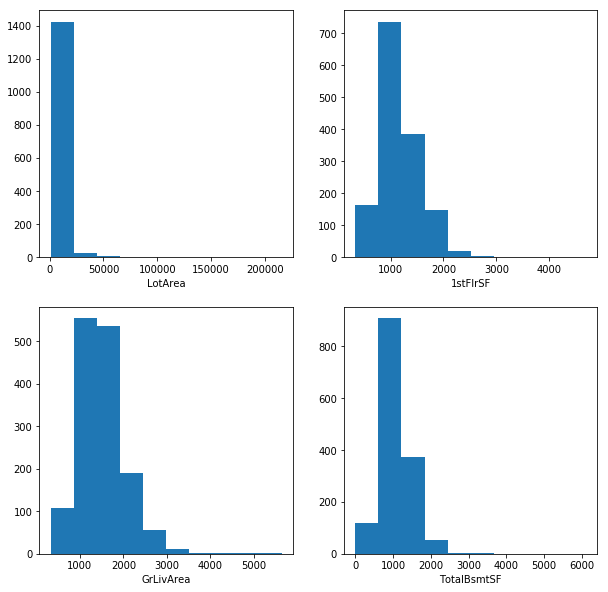

In [140]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xlabel(norm_features[i])
    plt.hist(Train_data[norm_features[i]],orientation='vertical',histtype='bar')
plt.show()

取对数后的分布

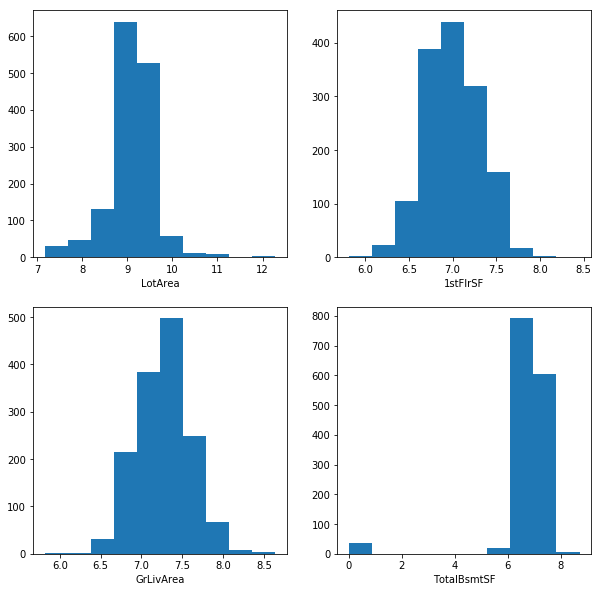

In [141]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xlabel(norm_features[i])
    plt.hist(np.log(Train_data[norm_features[i]]+1),orientation='vertical',histtype='bar')
plt.show()

除 TotalBsmtSF特征外，其他特征在取对数之后看起来都近似正态分布
而 TotalBsmtSF则是因为一些值为0，导致一些数据不符合

于是将TotalBsmtSF 删除，将其余的特征取对数后，对这些特征进行Z-score标准化

In [142]:
norm_features.remove('TotalBsmtSF')

In [143]:
normalize_Train_data=pd.DataFrame()
for f in norm_features:
    normalize_Train_data[f]=(np.log(Train_data[f]+1))
normalize_Train_data.head()

,LotArea,1stFlrSF,GrLivArea
0,9.042040,6.753438,7.444833
1,9.169623,7.141245,7.141245
2,9.328212,6.825460,7.488294
3,9.164401,6.869014,7.448916
4,9.565284,7.044033,7.695758


Z-score归一化方法

In [144]:
norm_mean=normalize_Train_data.mean().copy()
norm_std=normalize_Train_data.std().copy()
norm_mean

LotArea      9.110917
1stFlrSF     7.008714
GrLivArea    7.268531
dtype: float64

In [145]:
normalize_Train_data=(normalize_Train_data-normalize_Train_data.mean())/normalize_Train_data.std()

查看归一化结果

In [146]:
normalize_Train_data.head()

,LotArea,1stFlrSF,GrLivArea
0,-0.133084,-0.804317,0.528775
1,0.113432,0.417575,-0.381762
2,0.419860,-0.577392,0.659124
3,0.103343,-0.440162,0.541021
4,0.877932,0.111281,1.281362


对其余连续特征进行min-max标准化的方法

In [147]:
min_max_features=continuous_features.copy()
for f in norm_features:
    min_max_features.remove(f)
#min_max_features.remove('Id')
len(min_max_features)

30

In [148]:
mmf_data=Train_data[min_max_features]
mmf_data.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,2003,2003,706,0,150,856,854,...,548,0,61,0,0,0,0,0,2,2008
1,20,6,8,1976,1976,978,0,284,1262,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,7,5,2001,2002,486,0,434,920,866,...,608,0,42,0,0,0,0,0,9,2008
3,70,7,5,1915,1970,216,0,540,756,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,8,5,2000,2000,655,0,490,1145,1053,...,836,192,84,0,0,0,0,0,12,2008


In [149]:
mmf_max=mmf_data.max().copy()
mmf_min=mmf_data.min().copy()
mmf_min

MSSubClass         20
OverallQual         1
OverallCond         1
YearBuilt        1872
YearRemodAdd     1950
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
2ndFlrSF            0
LowQualFinSF        0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        2
Fireplaces          0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              1
YrSold           2006
dtype: int64

min-max归一化方法

In [150]:
mmf_data=(mmf_data-mmf_data.min())/(mmf_data.max()-mmf_data.min())
mmf_data.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.666667,0.500,0.949275,0.883333,0.125089,0.0,0.064212,0.140098,0.413559,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.555556,0.875,0.753623,0.433333,0.173281,0.0,0.121575,0.206547,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.666667,0.500,0.934783,0.866667,0.086109,0.0,0.185788,0.150573,0.419370,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.666667,0.500,0.311594,0.333333,0.038271,0.0,0.231164,0.123732,0.366102,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.777778,0.500,0.927536,0.833333,0.116052,0.0,0.209760,0.187398,0.509927,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


合并构成完整的归一化连续特征

In [151]:
normalize_Train_data[min_max_features]=mmf_data

In [152]:
normalize_Train_data

,LotArea,1stFlrSF,GrLivArea,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.133084,-0.804317,0.528775,0.235294,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,...,0.386460,0.000000,0.111517,0.000000,0.000000,0.000000,0.0,0.000000,0.090909,0.50
1,0.113432,0.417575,-0.381762,0.000000,0.555556,0.875,0.753623,0.433333,0.173281,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.363636,0.25
2,0.419860,-0.577392,0.659124,0.235294,0.666667,0.500,0.934783,0.866667,0.086109,0.000000,...,0.428773,0.000000,0.076782,0.000000,0.000000,0.000000,0.0,0.000000,0.727273,0.50
3,0.103343,-0.440162,0.541021,0.294118,0.666667,0.500,0.311594,0.333333,0.038271,0.000000,...,0.452750,0.000000,0.063985,0.492754,0.000000,0.000000,0.0,0.000000,0.090909,0.00
4,0.877932,0.111281,1.281362,0.235294,0.777778,0.500,0.927536,0.833333,0.116052,0.000000,...,0.589563,0.224037,0.153565,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.50
5,0.858185,-1.033011,-0.153224,0.176471,0.444444,0.500,0.876812,0.750000,0.129695,0.000000,...,0.338505,0.046674,0.054845,0.000000,0.629921,0.000000,0.0,0.045161,0.818182,0.75
6,0.208462,1.344510,0.500597,0.000000,0.777778,0.500,0.956522,0.916667,0.242558,0.000000,...,0.448519,0.297550,0.104205,0.000000,0.000000,0.000000,0.0,0.000000,0.636364,0.25
7,0.264729,0.005034,1.130319,0.235294,0.666667,0.625,0.731884,0.383333,0.152197,0.021710,...,0.341326,0.274212,0.372943,0.413043,0.000000,0.000000,0.0,0.022581,0.909091,0.75
8,-0.756335,-0.246451,0.638915,0.176471,0.666667,0.500,0.427536,0.000000,0.000000,0.000000,...,0.330042,0.105018,0.000000,0.371377,0.000000,0.000000,0.0,0.000000,0.272727,0.50
9,-0.384214,-0.081452,-0.856791,1.000000,0.444444,0.625,0.485507,0.000000,0.150780,0.000000,...,0.144570,0.000000,0.007313,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.50


### 7. 逻辑回归+L2正则化

训练集特征 X

In [153]:
# 训练集 X
train_X=normalize_Train_data
train_X

,LotArea,1stFlrSF,GrLivArea,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.133084,-0.804317,0.528775,0.235294,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,...,0.386460,0.000000,0.111517,0.000000,0.000000,0.000000,0.0,0.000000,0.090909,0.50
1,0.113432,0.417575,-0.381762,0.000000,0.555556,0.875,0.753623,0.433333,0.173281,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.363636,0.25
2,0.419860,-0.577392,0.659124,0.235294,0.666667,0.500,0.934783,0.866667,0.086109,0.000000,...,0.428773,0.000000,0.076782,0.000000,0.000000,0.000000,0.0,0.000000,0.727273,0.50
3,0.103343,-0.440162,0.541021,0.294118,0.666667,0.500,0.311594,0.333333,0.038271,0.000000,...,0.452750,0.000000,0.063985,0.492754,0.000000,0.000000,0.0,0.000000,0.090909,0.00
4,0.877932,0.111281,1.281362,0.235294,0.777778,0.500,0.927536,0.833333,0.116052,0.000000,...,0.589563,0.224037,0.153565,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.50
5,0.858185,-1.033011,-0.153224,0.176471,0.444444,0.500,0.876812,0.750000,0.129695,0.000000,...,0.338505,0.046674,0.054845,0.000000,0.629921,0.000000,0.0,0.045161,0.818182,0.75
6,0.208462,1.344510,0.500597,0.000000,0.777778,0.500,0.956522,0.916667,0.242558,0.000000,...,0.448519,0.297550,0.104205,0.000000,0.000000,0.000000,0.0,0.000000,0.636364,0.25
7,0.264729,0.005034,1.130319,0.235294,0.666667,0.625,0.731884,0.383333,0.152197,0.021710,...,0.341326,0.274212,0.372943,0.413043,0.000000,0.000000,0.0,0.022581,0.909091,0.75
8,-0.756335,-0.246451,0.638915,0.176471,0.666667,0.500,0.427536,0.000000,0.000000,0.000000,...,0.330042,0.105018,0.000000,0.371377,0.000000,0.000000,0.0,0.000000,0.272727,0.50
9,-0.384214,-0.081452,-0.856791,1.000000,0.444444,0.625,0.485507,0.000000,0.150780,0.000000,...,0.144570,0.000000,0.007313,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.50


训练集labels y

In [154]:
# 训练集labels_y
train_y=Train_data['PriceClass']
train_y.head()

0    0
1    0
2    1
3    0
4    1
Name: PriceClass, dtype: int64

#### 五折交叉验证，正则化参数倒数从10-10^9

开始训练

设置cv=5，penalty=l2

In [213]:
# 交叉验证
import math
cs_list=[math.pow(10,i) for i in range(0,10)]
lg_num=LogisticRegressionCV(cv=5,Cs=cs_list,penalty='l2',scoring='accuracy',
                            solver='lbfgs',tol=0.0001,max_iter=100000,
                            multi_class='auto',refit=True).fit(train_X,train_y)

正则化参数如下，对下列参数依次进行验证

In [214]:
cs_list

[1.0,
 10.0,
 100.0,
 1000.0,
 10000.0,
 100000.0,
 1000000.0,
 10000000.0,
 100000000.0,
 1000000000.0]

每个fold ，每个正则化参数的accuracy如下

每行对应每个正则化参数下的结果

每列对应同一正则化参数的不同fold

shape=(5,9)

In [215]:
lg_num.scores_

{1: array([[0.93150685, 0.93835616, 0.93835616, 0.93493151, 0.93150685,
         0.93150685, 0.93150685, 0.93150685, 0.93150685, 0.93150685],
        [0.94863014, 0.95890411, 0.95205479, 0.95205479, 0.95205479,
         0.95205479, 0.95205479, 0.95205479, 0.95205479, 0.95205479],
        [0.93835616, 0.93835616, 0.93493151, 0.93493151, 0.93493151,
         0.93493151, 0.93493151, 0.93493151, 0.93493151, 0.93493151],
        [0.94520548, 0.94863014, 0.94520548, 0.94520548, 0.94520548,
         0.94520548, 0.94520548, 0.94520548, 0.94520548, 0.94520548],
        [0.91065292, 0.92439863, 0.93127148, 0.93127148, 0.93127148,
         0.93127148, 0.93127148, 0.93127148, 0.93127148, 0.93127148]])}

表现最好的正则化参数：10，即0.1

In [216]:
lg_num.C_

array([10.])

In [217]:
y_train_predict=lg_num.predict(normalize_Train_data)

查看训练集预测表现

In [218]:
from sklearn.metrics import classification_report
print(classification_report(y_true=Train_data['PriceClass'], y_pred=y_train_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1124
           1       0.92      0.87      0.89       335

    accuracy                           0.95      1459
   macro avg       0.94      0.93      0.93      1459
weighted avg       0.95      0.95      0.95      1459



In [219]:
from sklearn.metrics import accuracy_score

accuracy_score(Train_data['PriceClass'],y_train_predict)

0.9527073337902673

### 8. 对测试集做同样的归一化操作

对正态分布特征进行Z-score归一化

In [220]:
normalize_Test_data=np.log(Test_data[norm_features]+1)
normalize_Test_data.head()

,LotArea,1stFlrSF,GrLivArea
0,9.360741,6.799056,6.799056
1,9.565775,7.192934,7.192934
2,9.534668,6.834109,7.396335
3,9.208238,6.831954,7.380879
4,8.518392,7.155396,7.155396


In [221]:
norm_std

LotArea      0.517543
1stFlrSF     0.317382
GrLivArea    0.333416
dtype: float64

Z-score 归一化： (x-mean)/std

In [222]:
normalize_Test_data=(normalize_Test_data-norm_mean)/norm_std

In [223]:
normalize_Test_data

,LotArea,1stFlrSF,GrLivArea
0,0.482713,-0.660586,-1.408074
1,0.878880,0.580436,-0.226733
2,0.818775,-0.550142,0.383318
3,0.188045,-0.556932,0.336960
4,-1.144879,0.462162,-0.339319
5,0.192301,-1.166247,0.430781
6,-0.243647,0.224689,-0.565372
7,-0.144089,-1.060806,0.065270
8,0.226008,0.608736,-0.199794
9,-0.144549,-0.710149,-1.455254


In [224]:
mmf_Test_data=Test_data[min_max_features]
mmf_Test_data.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,5,6,1961,1961,468.0,144.0,270.0,882.0,0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,6,6,1958,1958,923.0,0.0,406.0,1329.0,0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,5,5,1997,1998,791.0,0.0,137.0,928.0,701,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,6,6,1998,1998,602.0,0.0,324.0,926.0,678,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,8,5,1992,1992,263.0,0.0,1017.0,1280.0,0,...,506.0,0,82,0,0,144,0,0,1,2010


min-max 归一化方法: (x-min)/(max-min)

In [225]:
mmf_Test_data=(mmf_Test_data-mmf_min)/(mmf_max-mmf_min)
mmf_Test_data.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.000000,0.444444,0.625,0.644928,0.183333,0.082920,0.097693,0.115582,0.144354,0.000000,...,0.514810,0.163361,0.000000,0.0,0.0,0.25,0.0,0.000000,0.454545,1.0
1,0.000000,0.555556,0.625,0.623188,0.133333,0.163536,0.000000,0.173801,0.217512,0.000000,...,0.220028,0.458576,0.065814,0.0,0.0,0.00,0.0,0.806452,0.454545,1.0
2,0.235294,0.444444,0.500,0.905797,0.800000,0.140149,0.000000,0.058647,0.151882,0.339467,...,0.339915,0.247375,0.062157,0.0,0.0,0.00,0.0,0.000000,0.181818,1.0
3,0.235294,0.555556,0.625,0.913043,0.800000,0.106662,0.000000,0.138699,0.151555,0.328329,...,0.331453,0.420070,0.065814,0.0,0.0,0.00,0.0,0.000000,0.454545,1.0
4,0.588235,0.777778,0.500,0.869565,0.700000,0.046598,0.000000,0.435360,0.209493,0.000000,...,0.356841,0.000000,0.149909,0.0,0.0,0.30,0.0,0.000000,0.000000,1.0


In [226]:
normalize_Test_data[min_max_features]=mmf_Test_data

查看归一化结果

In [227]:
normalize_Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
LotArea          1459 non-null float64
1stFlrSF         1459 non-null float64
GrLivArea        1459 non-null float64
MSSubClass       1459 non-null float64
OverallQual      1459 non-null float64
OverallCond      1459 non-null float64
YearBuilt        1459 non-null float64
YearRemodAdd     1459 non-null float64
BsmtFinSF1       1459 non-null float64
BsmtFinSF2       1459 non-null float64
BsmtUnfSF        1459 non-null float64
TotalBsmtSF      1459 non-null float64
2ndFlrSF         1459 non-null float64
LowQualFinSF     1459 non-null float64
BsmtFullBath     1459 non-null float64
BsmtHalfBath     1459 non-null float64
FullBath         1459 non-null float64
HalfBath         1459 non-null float64
BedroomAbvGr     1459 non-null float64
KitchenAbvGr     1459 non-null float64
TotRmsAbvGrd     1459 non-null float64
Fireplaces       1459 non-null float64
GarageCars       1459 non-null floa

对测试集进行预测

In [228]:
y_test_predict=lg_num.predict(normalize_Test_data)

In [229]:
y_test_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [230]:
y_test_pd=pd.DataFrame()
y_test_pd['Id']=Test_data['Id']
y_test_pd['PriceClass']=pd.DataFrame(y_test_predict)

In [231]:
y_test_pd

,Id,PriceClass
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
5,1466,0
6,1467,0
7,1468,0
8,1469,0
9,1470,0


### 9.将预测的分类与sample_submission的分类进行对比，得到accuracy

In [232]:
Test_labels=pd.read_csv(path+'sample_submission.csv')
Test_labels

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831


In [233]:
Test_labels['PriceClass']=pd.cut(Test_labels['SalePrice'],sp_bins,labels=False,right=True)

In [234]:
Test_labels

,Id,SalePrice,PriceClass
0,1461,169277.052498,0
1,1462,187758.393989,0
2,1463,183583.683570,0
3,1464,179317.477511,0
4,1465,150730.079977,0
5,1466,177150.989247,0
6,1467,172070.659229,0
7,1468,175110.956520,0
8,1469,162011.698832,0
9,1470,160726.247831,0


查看测试集上预测表现

得到 accuracy

In [235]:
from sklearn.metrics import accuracy_score

accuracy_score(Test_labels['PriceClass'],y_test_pd['PriceClass'])


0.7902673063742289

In [236]:
from sklearn.metrics import classification_report
print(classification_report(y_true=Test_labels['PriceClass'], y_pred=y_test_pd['PriceClass']))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      1430
           1       0.04      0.41      0.07        29

    accuracy                           0.79      1459
   macro avg       0.51      0.61      0.48      1459
weighted avg       0.97      0.79      0.87      1459



### 10. 简单通过KMeans算法得到划分点

In [237]:
Train_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

仅使用SalePrice作为特征 进行KMeans算法

In [238]:
from sklearn.cluster import KMeans
X=np.array([Train_data['SalePrice'],Train_data['SalePrice']]).T
y_class = KMeans(n_clusters=2, random_state=9).fit_predict(X)

KMeans聚类得到的结果

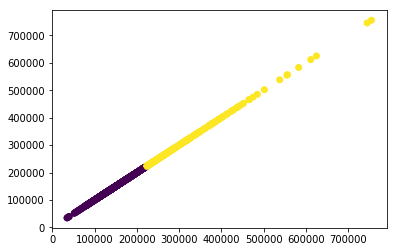

In [239]:
plt.scatter(X[:, 0], X[:, 1], c=y_class)

In [240]:
y_class=np.vstack((y_class,Train_data['SalePrice'])).T

In [241]:
y_class

array([[     0, 208500],
       [     0, 181500],
       [     1, 223500],
       ...,
       [     1, 266500],
       [     0, 142125],
       [     0, 147500]], dtype=int64)

按照SalePrice 从小到大排序

In [242]:
y_class = y_class[np.argsort(y_class[:,1])]
y_class

array([[     0,  34900],
       [     0,  35311],
       [     0,  37900],
       ...,
       [     1, 625000],
       [     1, 745000],
       [     1, 755000]], dtype=int64)

In [243]:
y_class.shape

(1459, 2)

获得划分点

In [244]:
for i in range(1459):
    if y_class[i,0]==1:
        print(i)
        break

1124


In [245]:
y_class[1120:]

array([[     0, 220000],
       [     0, 220000],
       [     0, 220000],
       [     0, 220000],
       [     1, 221000],
       [     1, 221000],
       [     1, 221500],
       [     1, 222000],
       [     1, 222000],
       [     1, 222000],
       [     1, 222500],
       [     1, 222500],
       [     1, 223000],
       [     1, 223500],
       [     1, 223500],
       [     1, 224000],
       [     1, 224000],
       [     1, 224500],
       [     1, 224900],
       [     1, 224900],
       [     1, 225000],
       [     1, 225000],
       [     1, 225000],
       [     1, 225000],
       [     1, 225000],
       [     1, 225000],
       [     1, 226000],
       [     1, 226000],
       [     1, 226000],
       [     1, 226700],
       [     1, 227000],
       [     1, 227000],
       [     1, 227000],
       [     1, 227680],
       [     1, 227875],
       [     1, 228000],
       [     1, 228000],
       [     1, 228500],
       [     1, 228500],
       [     1, 228950],


价格划分值

In [246]:
split_point=(y_class[1123,1]+y_class[1124,1])/2
split_point

220500.0

## 11. 结果分析

本次作业在上一次作业的基础上进行。新增的步骤应该是从第5点开始，首先对价格进行划分，将价格划分成两类，划分点的确定是简单通过KMeans算法实现的，具体实现步骤在第10点。

随后需要对数据进行归一化的处理，否则会导致模型不收敛。发现有三个特征取对数后符合正态分布，于是对这三个特征做Z-score归一化的方法，其余特征采用min-max的归一化方法。

再之后就是代入逻辑回归模型，加入L2正则化。采用5折交叉验证的方法，并对一系列的正则化参数进行尝试，从中选取最优的正则化参数。最终在训练集上得到0.95的准确率。

在对测试集进行验证之前，首先需要对测试集做同样的归一化处理，随后对测试集进行测试。但在测试集上仅得到了0.79的准确率。

在特征的选择上，我们尝试了选择前 k 个与 SalePrice 相关性较强的连续特征进行拟合，也尝试了选择所有的特征进行拟合（包括标称型特征，对其进行onehot编码），但都不如选择所有的连续特征进行拟合的效果好。

而模型在五折交叉验证时有较好的结果，但在测试集上却表现一般。原因有可能是模型过拟合了，但对模型多次调整，模型在测试集上依旧效果一般。